# Feature subset selection using ExtraTreesClassifier
and the Iris dataset

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import decomposition
from sklearn import datasets
import pandas as pd

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

In [3]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.20.0.


In [4]:
np.random.seed(5)

In [5]:
iris_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv('../00 Demo Notebooks/data/iris.csv', names=iris_columns)

In [6]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
# Extract the continuous attributes to a matrix X
X = iris.iloc[:,0:4].values

In [8]:
# Extract the class attribute as y
y = iris.iloc[:,4].astype('category').values

### Tree-based feature selection

In [9]:
# Compute feature importances using the ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)
clf.feature_importances_  

array([0.07961134, 0.05757185, 0.44809422, 0.41472259])

In [10]:
np.mean(clf.feature_importances_)

0.25

In [11]:
# Select the most important features based on the prefit model.
# By default, there is no maximum number of important features; all
# above the threshold (default is the mean) will be selected.
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape

(150, 2)

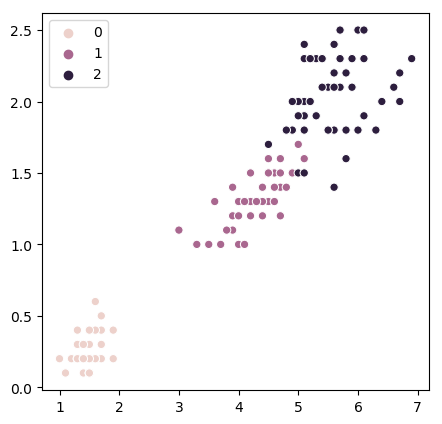

In [12]:
plt.figure(1, figsize=(5,5), dpi=100)
_ = sns.scatterplot(X_new[:,0], X_new[:,1], hue=y.codes)